# <center>AB_NYC_2019</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/admin/OneDrive/Desktop/New Data/Airbnb/NewYork\AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.shape

(48895, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['Year'] = df['last_review'].dt.year
df['Month'] = df['last_review'].dt.month
df['Day'] = df['last_review'].dt.day
df['Day of Week'] = df['last_review'].dt.dayofweek

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(38821, 20)

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,Month,Day,Day of Week
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0,4.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0,1.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0,4.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019.0,6.0,22.0,5.0


In [13]:
df.drop(df.columns[0],axis=1,inplace=True)

### Univariate analysis

In [14]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Year', 'Month',
       'Day', 'Day of Week'],
      dtype='object')

In [15]:
print(f"Count of Unique Value: {df['name'].nunique()}")

Count of Unique Value: 38253


In [16]:
print(f"Count of Unique Value : {df['neighbourhood_group'].nunique()}")
print(f" List of neighbourhood_group: {df['neighbourhood_group'].unique()}")

Count of Unique Value : 5
 List of neighbourhood_group: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [17]:
print(f"Count of Unique Value: {df['neighbourhood'].nunique()}")

Count of Unique Value: 218


In [18]:
print(f"Count of Unique Value: {df['room_type'].nunique()}")
print(f"List of room_type: {df['room_type'].unique()}")

Count of Unique Value: 3
List of room_type: ['Private room' 'Entire home/apt' 'Shared room']


In [19]:
print(f"Count of Unique Value: {df['price'].nunique()}")
print(f"Min Price: {df['price'].min()} ")
print(f"Max Price: {df['price'].max()}")
print(f"Mean price: {df['price'].mean()}")

Count of Unique Value: 581
Min Price: 0 
Max Price: 10000
Mean price: 142.33252621004095


In [20]:
print(f"Count of Unique Value: {df['minimum_nights'].nunique()}")
print(f"Min minimum_nights: {df['minimum_nights'].min()} ")
print(f"Max minimum_nights: {df['minimum_nights'].max()}")
print(f"Mean minimum_nights: {df['minimum_nights'].mean()}")

Count of Unique Value: 89
Min minimum_nights: 1 
Max minimum_nights: 1250
Mean minimum_nights: 5.869220267381056


In [21]:
print(f"Count of Unique Value: {df['number_of_reviews'].nunique()}")
print(f"Min number_of_reviews: {df['number_of_reviews'].min()} ")
print(f"Max number_of_reviews: {df['number_of_reviews'].max()}")
print(f"Mean number_of_reviews: {df['number_of_reviews'].mean()}")

Count of Unique Value: 393
Min number_of_reviews: 1 
Max number_of_reviews: 629
Mean number_of_reviews: 29.290255274207258


In [22]:
print(f"Count of Unique Value: {df['last_review'].nunique()}")
print(f"Min last_review: {df['last_review'].min()} ")
print(f"Max last_review: {df['last_review'].max()}")
print(f"Mean last_review: {df['last_review'].mean()}")

Count of Unique Value: 1764
Min last_review: 2011-03-28 00:00:00 
Max last_review: 2019-07-08 00:00:00
Mean last_review: 2018-10-04 07:23:47.072975872


In [23]:
print(f"Count of Unique Value: {df['reviews_per_month'].nunique()}")
print(f"Min reviews_per_month: {df['reviews_per_month'].min()} ")
print(f"Max reviews_per_month: {df['reviews_per_month'].max()}")
print(f"Mean reviews_per_month: {df['reviews_per_month'].mean()}")

Count of Unique Value: 937
Min reviews_per_month: 0.01 
Max reviews_per_month: 58.5
Mean reviews_per_month: 1.3732291800829448


In [24]:
print(f"Count of Unique Value: {df['calculated_host_listings_count'].nunique()}")
print(f"Min calculated_host_listings_count: {df['calculated_host_listings_count'].min()} ")
print(f"Max calculated_host_listings_count: {df['calculated_host_listings_count'].max()}")
print(f"Mean calculated_host_listings_count: {df['calculated_host_listings_count'].mean()}")

Count of Unique Value: 47
Min calculated_host_listings_count: 1 
Max calculated_host_listings_count: 327
Mean calculated_host_listings_count: 5.16661085494964


In [25]:
print(f"Count of Unique Value: {df['availability_365'].nunique()}")
print(f"Min availability_365: {df['availability_365'].min()} ")
print(f"Max availability_365: {df['availability_365'].max()}")
print(f"Mean availability_365: {df['availability_365'].mean()}")

Count of Unique Value: 366
Min availability_365: 0 
Max availability_365: 365
Mean availability_365: 114.88629865279101


In [26]:
print(f"Count of Unique Value: {df['Year'].nunique()}")
print(f"List of Unique Value: {df['Year'].unique()}")


Count of Unique Value: 9
List of Unique Value: [2018. 2019. 2017. 2011. 2016. 2012. 2015. 2013. 2014.]


In [29]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Year', 'Month',
       'Day', 'Day of Week'],
      dtype='object')


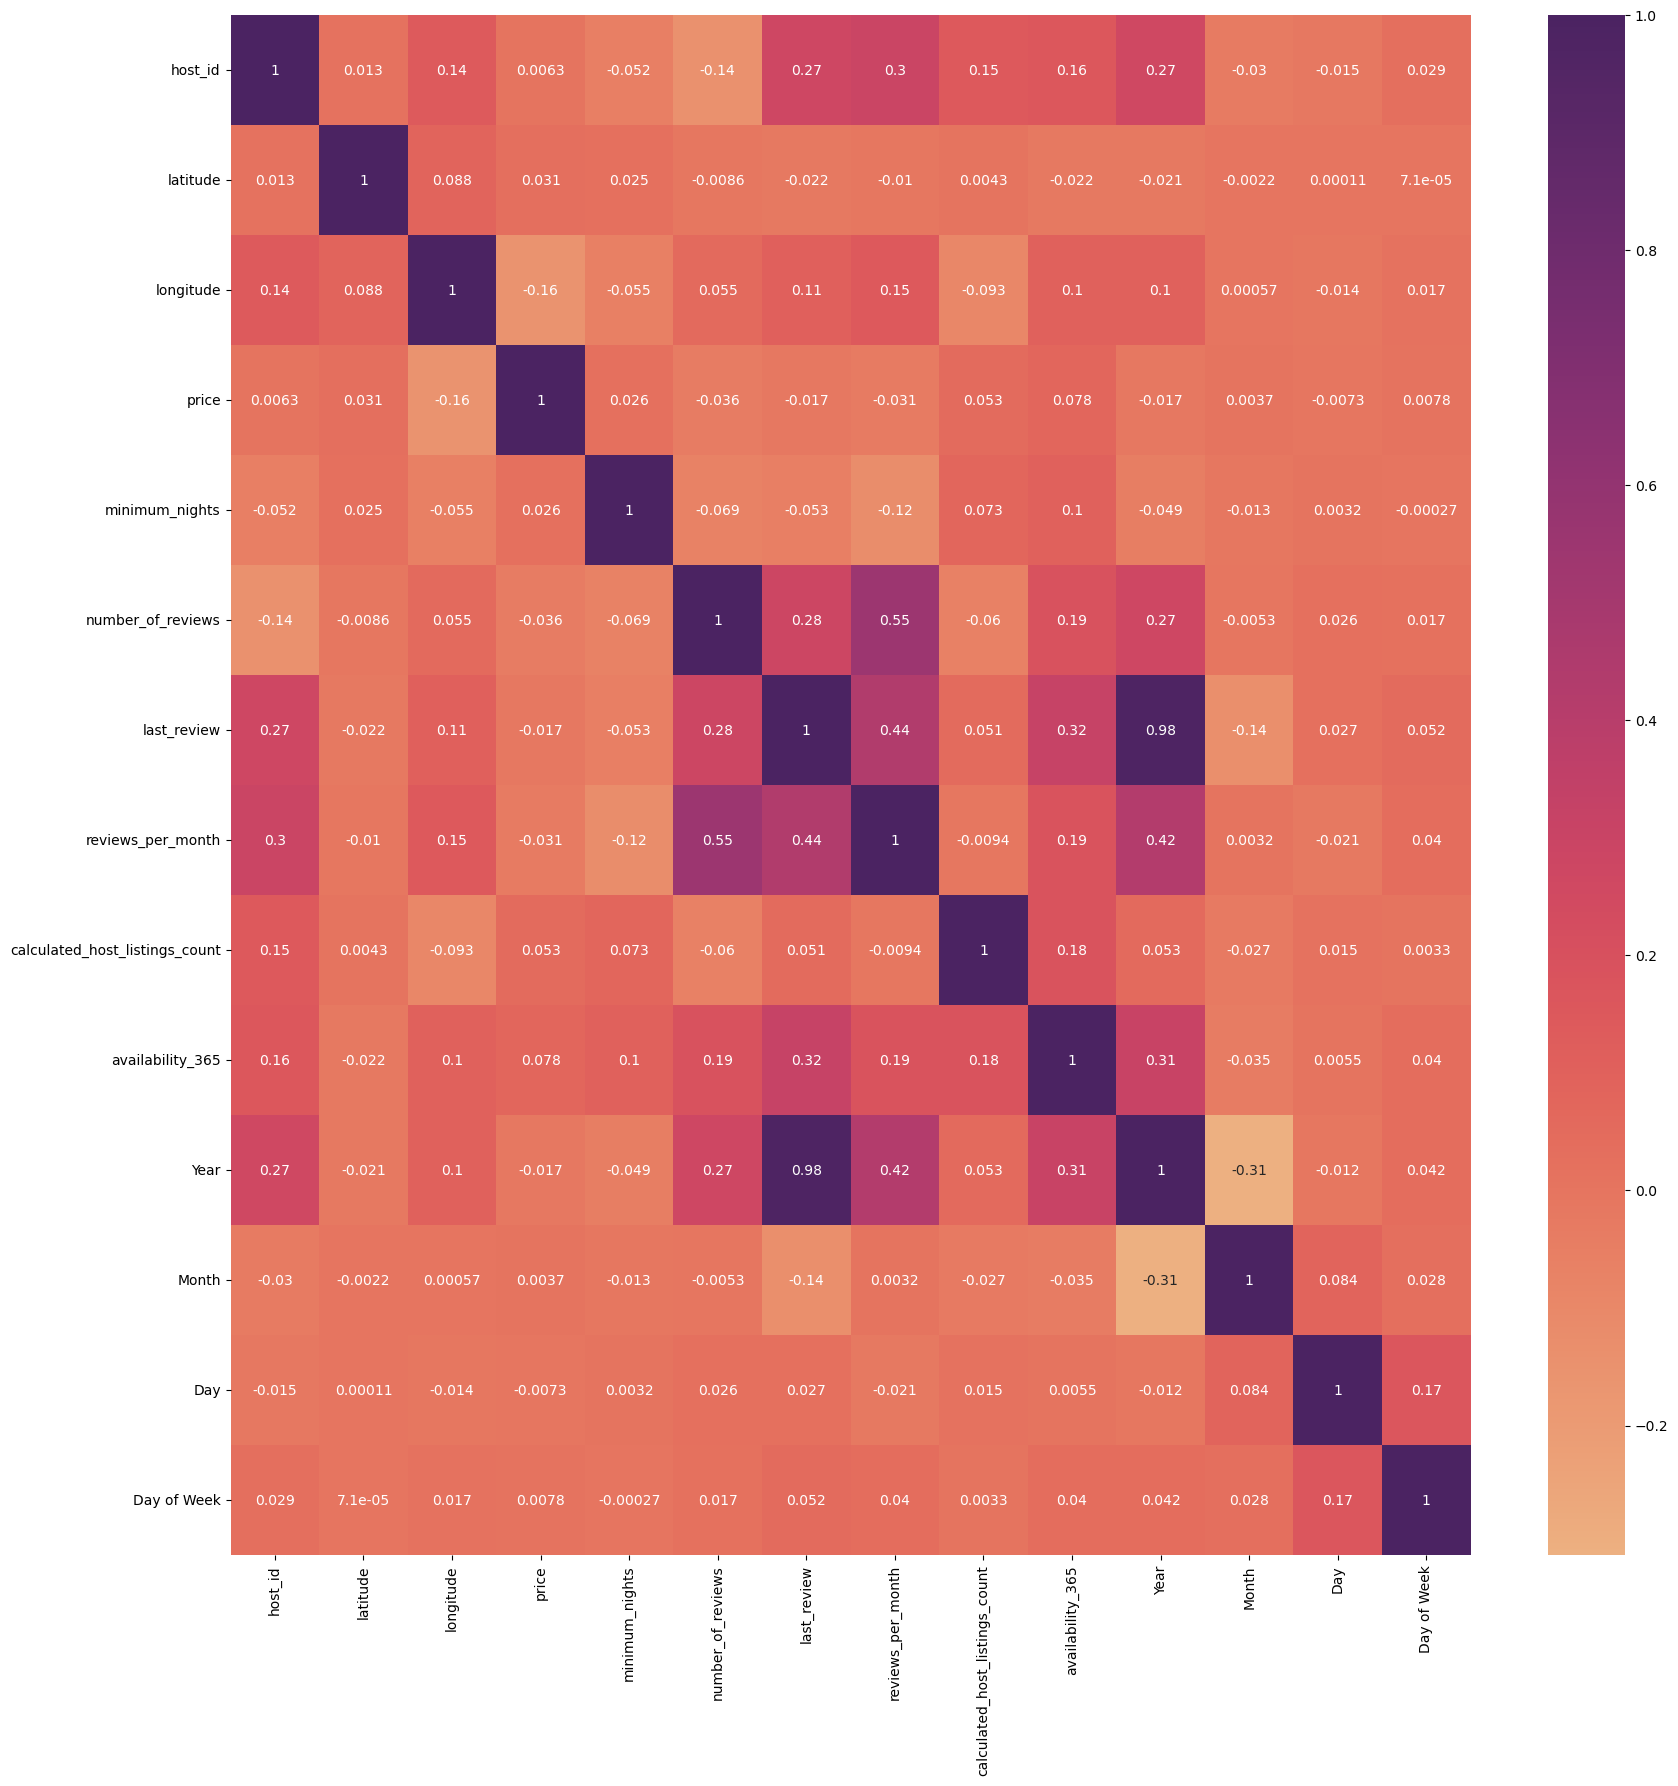

In [35]:
corr =  df[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='flare')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
df['neighbourhood_group'].value_counts().reset_index().rename(columns={'index':'neighbourhood','neighbourhood':'Count'})

,neighbourhood_group,count
0,Manhattan,16621
1,Brooklyn,16439
2,Queens,4572
3,Bronx,875
4,Staten Island,314


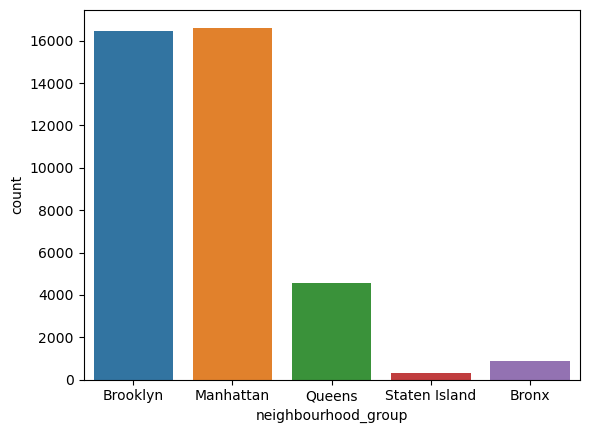

In [50]:
ax=sns.countplot(x='neighbourhood_group',data=df)


In [47]:
df['neighbourhood'].value_counts().reset_index().rename(columns={'index':'neighbourhood','neighbourhood':'Count'})

,Count,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


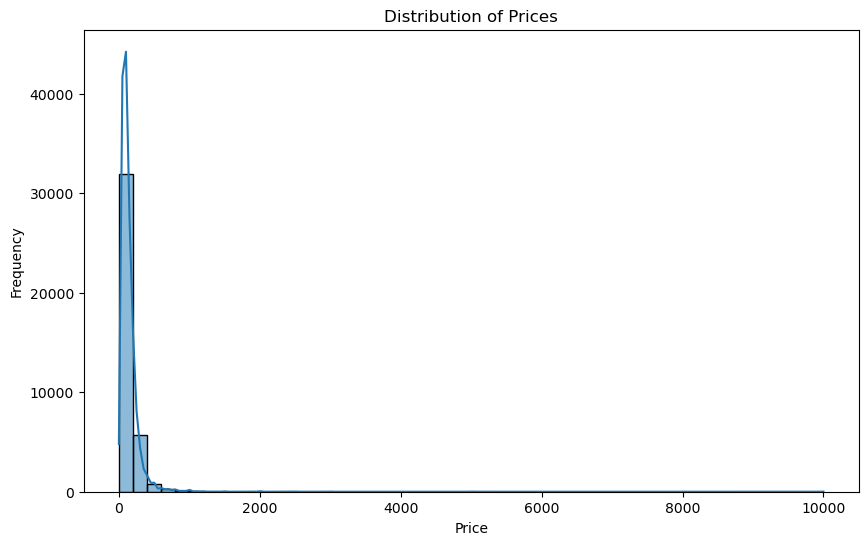

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


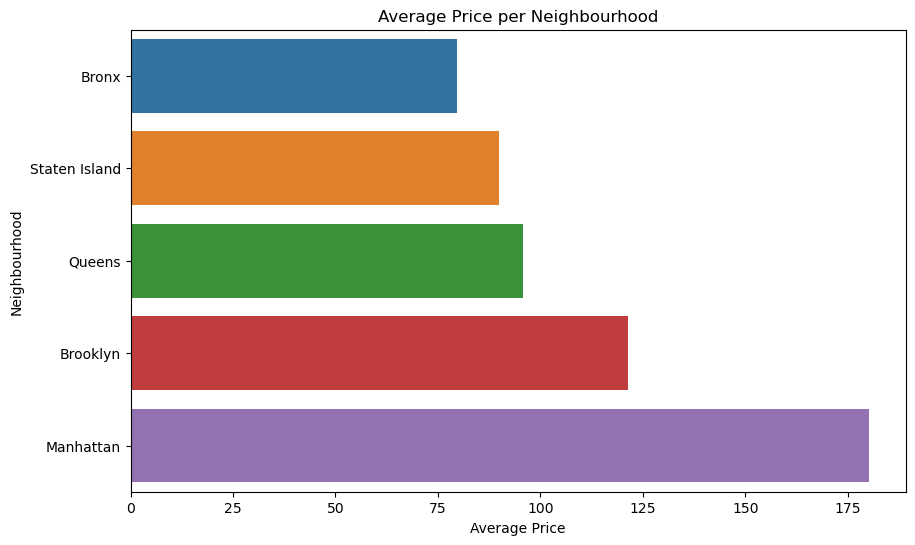

In [60]:
plt.figure(figsize=(10, 6))
avg_price_per_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values()
sns.barplot(x=avg_price_per_neighbourhood, y=avg_price_per_neighbourhood.index)
plt.title('Average Price per Neighbourhood')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()
